In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Title: Parkinsons Disease Data Set          

-----------------------------------------------------	          
          
Data Set Characteristics: Multivariate          
Number of Instances: 197          
Area: Life          
Attribute Characteristics: Real          
Number of Attributes: 23          
Date Donated: 2008-06-26          
Associated Tasks: Classification          
Missing Values? N/A          


-----------------------------------------------------          

Attribute Information:          

Matrix column entries (attributes):          
name - ASCII subject name and recording number          
MDVP:Fo(Hz) - Average vocal fundamental frequency          
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency          
MDVP:Flo(Hz) - Minimum vocal fundamental frequency          
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several           
measures of variation in fundamental frequency          
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude          
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent          
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation           

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('/Users/nishkamehlawat/Desktop/parkinson_diseases//parkinsons.csv') #Loading the dataset
pd.set_option('display.max_columns',None) #To Display all the columns
pd.set_option('display.max_rows',None)#To display all the rows
#df
df.head(4) #Displaying top entries 

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975


In [9]:
df.info()#Information about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [10]:
df.describe() #Description of the datsset

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
df.shape #Shape of our data

(195, 24)

In [12]:
df.isnull().sum() #Null values in our dataset

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
df[df.duplicated()] #Duplicate entries in our data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


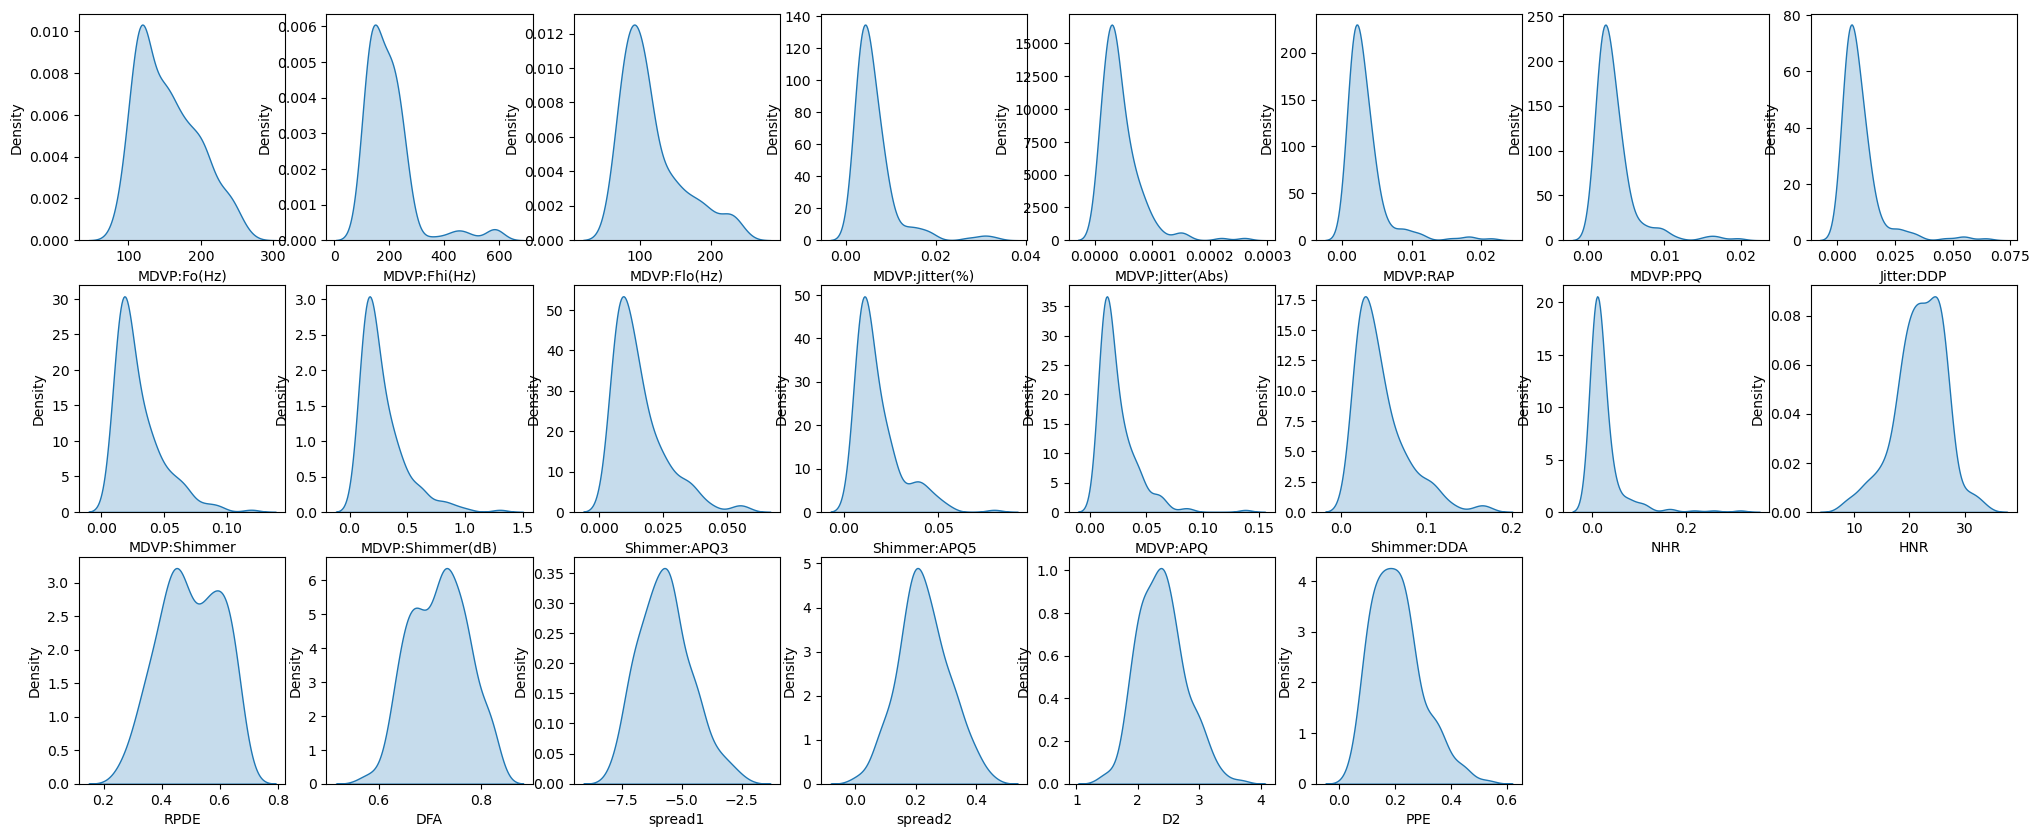

In [14]:
plt.figure(figsize=(25,10))
for i,col in enumerate(df.drop(['name','status'],axis=1)):
    plt.subplot(3,8,i+1)
    sns.kdeplot(df[col],shade=True)
plt.show()

In [15]:
df1 = df.iloc[: , 1:]
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


<Axes: >

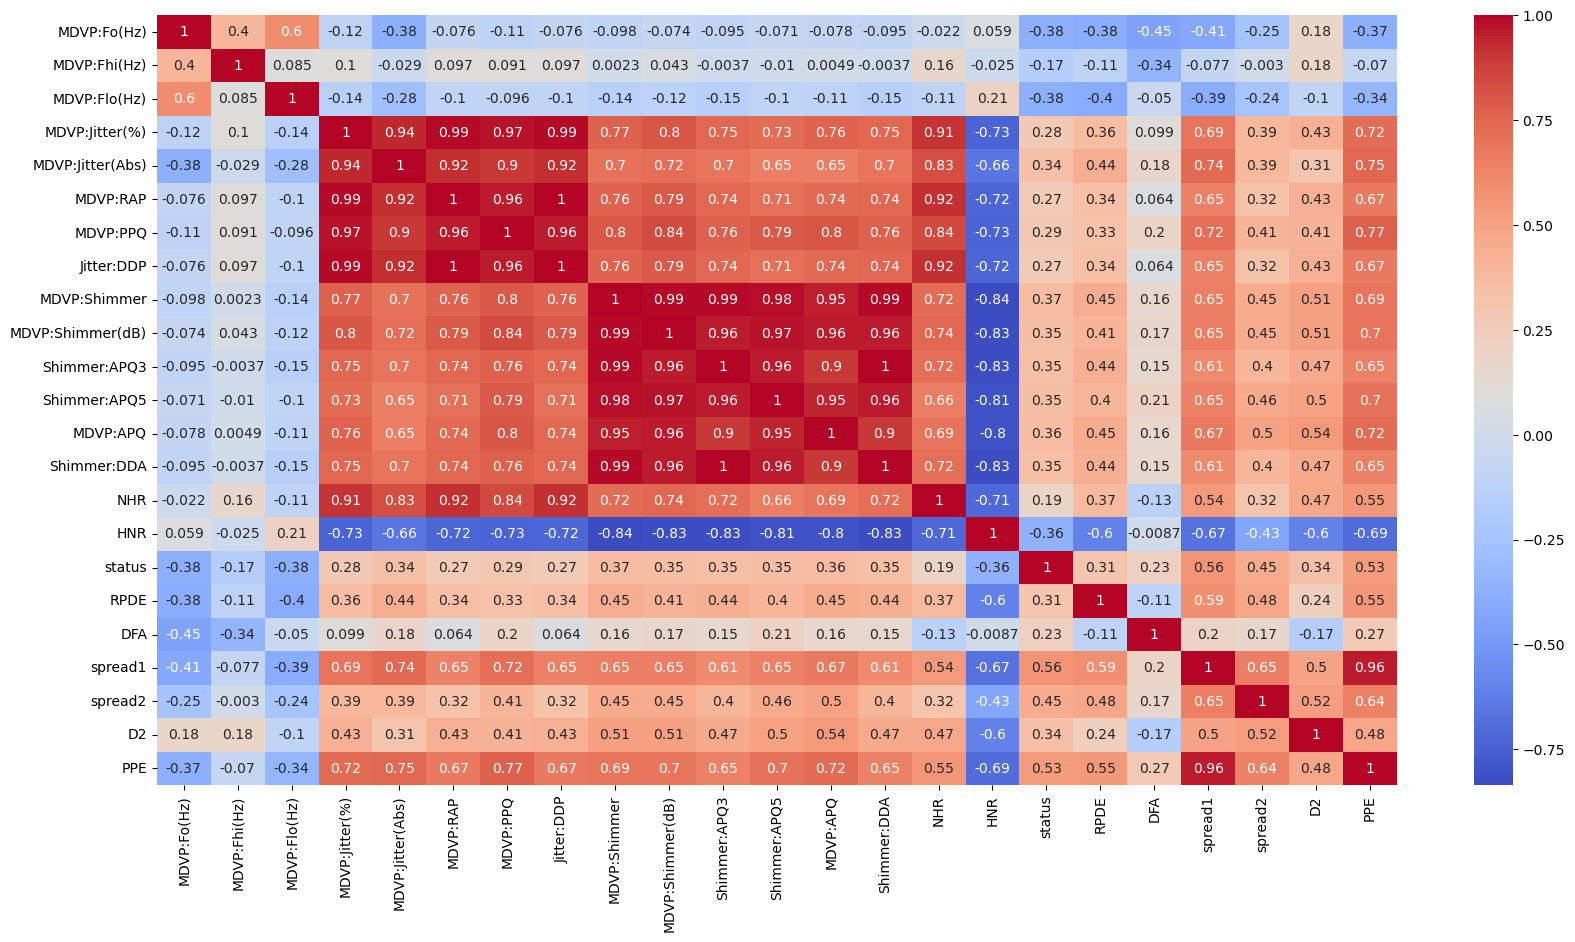

In [16]:

plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

* There seems to be a lot of multicoreneality between our features which needs to be treated
* Status is highly correlated with Spread 1, spread2, PPE
* Negative correlation with MDVP 

#Random Oversampler

In [17]:
df['status'].value_counts() #Target column analysis

status
1    147
0     48
Name: count, dtype: int64

In [18]:
df.shape

(195, 24)

In [19]:
#Splitting the dataset into features x and columns y
x=df.drop(columns=['name','status'])  #Exclude name which wil act as noise and status which is our target variable
y=df['status']


In [20]:
#Further splitting our data into testing and training set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=200,test_size=0.2,stratify=y)
x=xtest
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train_score=model.score(xtrain,ytrain)
    test_score=model.score(xtest,ytest)
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    ac=accuracy_score(ytest,ypred)
    roc_auc=roc_auc_score(ytest,ypred)
    fpr,tpr,threshold=roc_curve(ytest,ypred)
    plt.plot(fpr,tpr,label=model)
    
    print(f'Model:{model}\nTraining Score: {train_score}\nTesting Score: {test_score}\nConfusion Matrix: \n{cm}\
    \nClassification_report\n{cr}\nAccuracy Score: {ac}\nROC_AUC_Score: {roc_auc}\nFalsePositiveRate: {fpr}')
    print()
    return model


In [21]:
#Scaling the data for model efficiency
from sklearn.preprocessing import StandardScaler #Importing library
ss=StandardScaler() #Creating an object
ss.fit(xtrain) #Fitting train data
xtrain=ss.transform(xtrain) #Transforming train data
xtest=ss.transform(xtest) #Transforming test data

# Support Vector Machine

Model:SVC(C=100.0, degree=7, kernel='linear')
Training Score: 0.8910256410256411
Testing Score: 0.8974358974358975
Confusion Matrix: 
[[ 8  2]
 [ 2 27]]    
Classification_report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39

Accuracy Score: 0.8974358974358975
ROC_AUC_Score: 0.8655172413793103
FalsePositiveRate: [0.  0.2 1. ]



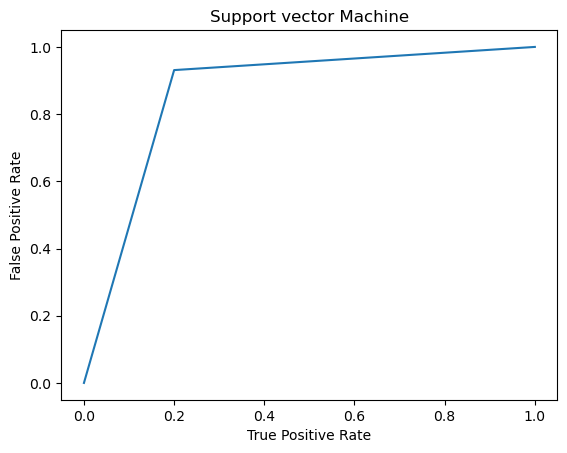

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("Support vector Machine")

svc=mymodel(SVC(kernel='linear',degree=7,C=100.0))

In [23]:
ypoints=fpr
ypoints
plt.plot(ypoints, marker = 'o')

NameError: name 'fpr' is not defined

# Random Forest Classifier

Model:RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=35)
Training Score: 0.9487179487179487
Testing Score: 0.8717948717948718
Confusion Matrix: 
[[ 5  5]
 [ 0 29]]    
Classification_report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39

Accuracy Score: 0.8717948717948718
ROC_AUC_Score: 0.75
FalsePositiveRate: [0.  0.5 1. ]



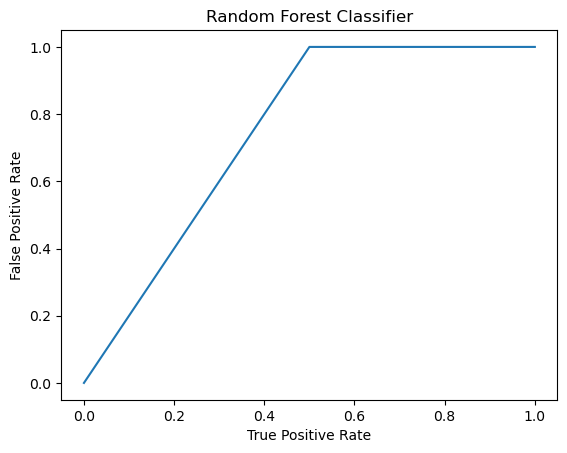

In [24]:
from sklearn.ensemble import RandomForestClassifier
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("Random Forest Classifier")
rfc=mymodel(RandomForestClassifier(max_depth=15,n_estimators=35,criterion='gini',min_samples_split=4,min_samples_leaf=5))

# Decision Tree Classifier

Model:DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=20)
Training Score: 0.8974358974358975
Testing Score: 0.8461538461538461
Confusion Matrix: 
[[ 7  3]
 [ 3 26]]    
Classification_report
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39

Accuracy Score: 0.8461538461538461
ROC_AUC_Score: 0.7982758620689654
FalsePositiveRate: [0.  0.3 1. ]



DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_leaf=20)

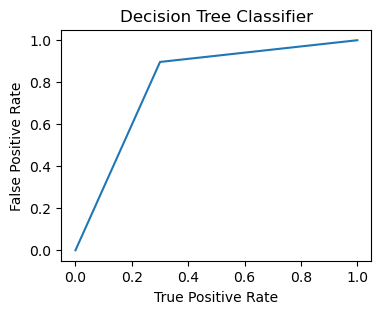

In [25]:
from sklearn.tree import DecisionTreeClassifier

plt.figure(figsize=(4,3))
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("Decision Tree Classifier")
dtc=mymodel(DecisionTreeClassifier(max_depth=30,criterion='entropy',min_samples_split=2,min_samples_leaf=20))
dtc

# KNeighbors Classifier

Model:KNeighborsClassifier()
Training Score: 0.967948717948718
Testing Score: 0.8717948717948718
Confusion Matrix: 
[[ 7  3]
 [ 2 27]]    
Classification_report
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39

Accuracy Score: 0.8717948717948718
ROC_AUC_Score: 0.8155172413793103
FalsePositiveRate: [0.  0.3 1. ]



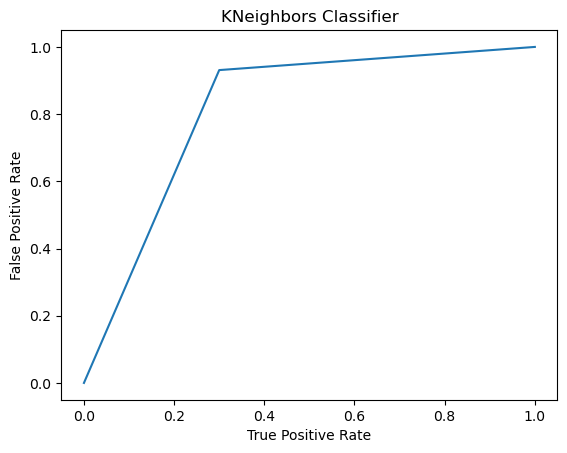

In [31]:
from sklearn.neighbors import KNeighborsClassifier
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("KNeighbors Classifier")
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

**HyperTuning**

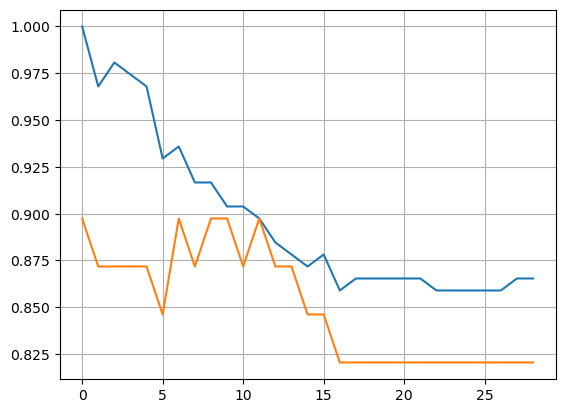

[0.8974358974358975,
 0.8717948717948718,
 0.8717948717948718,
 0.8717948717948718,
 0.8717948717948718,
 0.8461538461538461,
 0.8974358974358975,
 0.8717948717948718,
 0.8974358974358975,
 0.8974358974358975,
 0.8717948717948718,
 0.8974358974358975,
 0.8717948717948718,
 0.8717948717948718,
 0.8461538461538461,
 0.8461538461538461,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205,
 0.8205128205128205]

In [35]:
train_sc=[]
test_sc=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)
    
    train_sc.append(train)
    test_sc.append(test)

plt.plot(train_sc)
plt.plot(test_sc)
plt.grid()
plt.show()


Model:KNeighborsClassifier(n_neighbors=11)
Training Score: 0.9038461538461539
Testing Score: 0.8717948717948718
Confusion Matrix: 
[[ 5  5]
 [ 0 29]]    
Classification_report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39

Accuracy Score: 0.8717948717948718
ROC_AUC_Score: 0.75
FalsePositiveRate: [0.  0.5 1. ]



Text(0.5, 1.0, 'KNeighbor classifier')

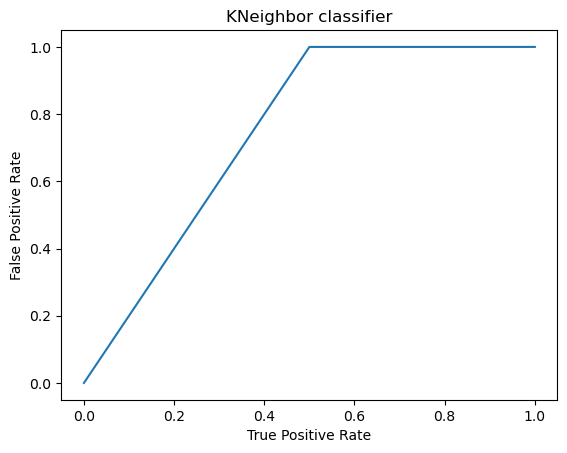

In [32]:
knn=mymodel(KNeighborsClassifier(n_neighbors=11))
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("KNeighbor classifier")

Model:LogisticRegression(C=100.0)
Training Score: 0.8782051282051282
Testing Score: 0.8974358974358975
Confusion Matrix: 
[[ 8  2]
 [ 2 27]]    
Classification_report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39

Accuracy Score: 0.8974358974358975
ROC_AUC_Score: 0.8655172413793103
FalsePositiveRate: [0.  0.2 1. ]



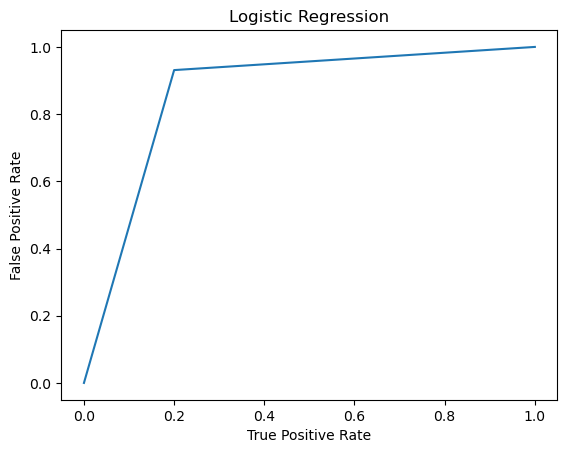

In [36]:
from sklearn.linear_model import LogisticRegression
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("Logistic Regression")
lr=mymodel(LogisticRegression(C=100.0))

# Feature Importance to deal with Multicoreneality and exclude irrelevant features

In [65]:
pip install XGBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Model:XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training Score: 1.0
Testing Score: 0.8974358974358975
Confusion Matrix: 
[[ 7  3]
 [ 1 28]]    
Classification_report
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
         

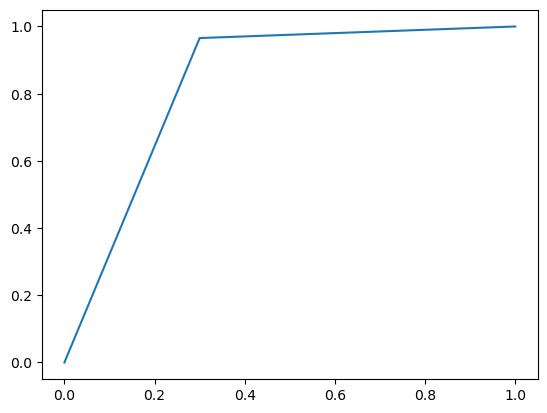

In [66]:
from xgboost import XGBClassifier
XGB=mymodel(XGBClassifier())

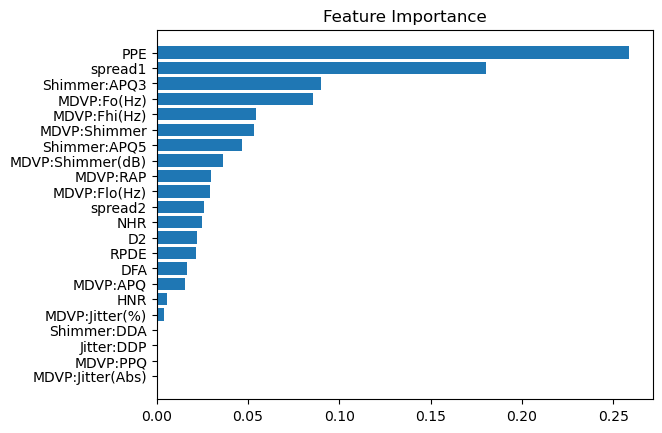

In [67]:
#Fetching the important features in our dataset
importance= XGB.feature_importances_ 

#Sorting
indices=np.argsort(importance)

#Plotting it visually 
plt.barh(range(len(indices)),importance[indices])
plt.title('Feature Importance')
plt.yticks(range(len(indices)),[x.columns[i] for i in indices])
plt.show()

In [68]:
df.sample(1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
19,phon_R01_S05_2,156.405,189.398,142.822,0.00768,0.00005,0.00372,0.00399,0.01116,0.03995,0.348,0.01721,0.02374,0.0431,0.05164,0.03365,17.153,1,0.649554,0.68608,-4.554466,0.340176,2.856676,0.322111


In [69]:
new_df=df[['spread1','PPE','MDVP:Fo(Hz)','Shimmer:APQ5','Shimmer:APQ3','MDVP:Fhi(Hz)','NHR','MDVP:Shimmer(dB)','D2','DFA','MDVP:Jitter(%)',\
       'spread2','status']]
x=new_df.drop('status',axis=1)
y=new_df['status']


In [70]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=200,test_size=0.2,stratify=y)
#Scaling the data for model efficiency
from sklearn.preprocessing import StandardScaler #Importing library
ss=StandardScaler() #Creating an object
ss.fit(xtrain) #Fitting train data
xtrain=ss.transform(xtrain) #Transforming train data
xtest=ss.transform(xtest) #Transforming test data


Model:SVC(C=10.0, degree=10)
Training Score: 0.9743589743589743
Testing Score: 0.8974358974358975
Confusion Matrix: 
[[ 8  2]
 [ 2 27]]    
Classification_report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39

Accuracy Score: 0.8974358974358975
ROC_AUC_Score: 0.8655172413793103
FalsePositiveRate: [0.  0.2 1. ]



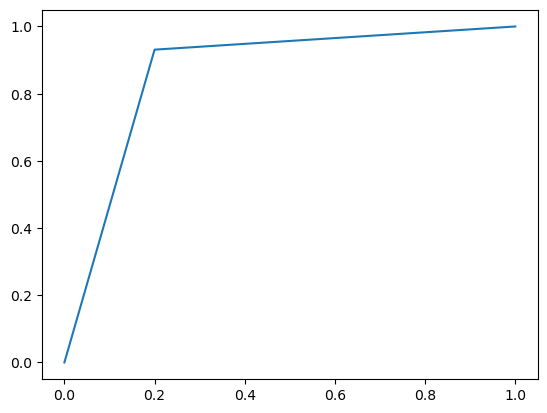

In [71]:
svc=mymodel(SVC(kernel='rbf',degree=10,C=10.0))

Training Score: 1.0
Testing Score: 0.9230769230769231
Confusion Matrix: 
[[ 8  2]
 [ 1 28]]    
Classification_report
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Accuracy Score: 0.9230769230769231
ROC_AUC_Score: 0.8827586206896553
FalsePositiveRate: [0.  0.2 1. ]


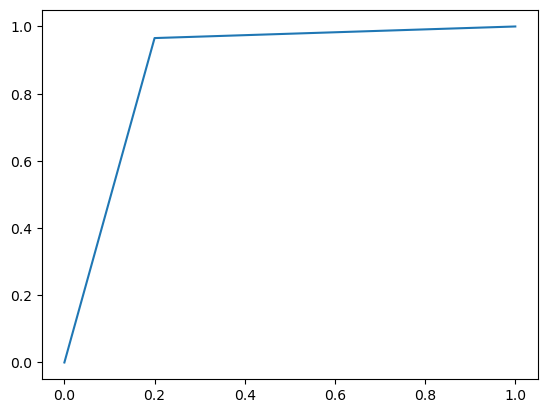

In [72]:
x=df.drop(['name','status'],axis=1)
y=df['status']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=200,test_size=0.2,stratify=y)

from sklearn.decomposition import PCA
pca=PCA(n_components=9,random_state=10)
xtrain_pc=pca.fit_transform(xtrain)
xtest_pc=pca.transform(xtest)

pca_model=XGBClassifier()
pca_model.fit(xtrain_pc,ytrain)
ypred=pca_model.predict(xtest_pc)

train_score=pca_model.score(xtrain_pc,ytrain)
test_score=pca_model.score(xtest_pc,ytest)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)
ac=accuracy_score(ytest,ypred)
roc_auc=roc_auc_score(ytest,ypred)
fpr,tpr,threshold=roc_curve(ytest,ypred)
plt.plot(fpr,tpr,label=pca_model)
    
print(f'Training Score: {train_score}\nTesting Score: {test_score}\nConfusion Matrix: \n{cm}\
    \nClassification_report\n{cr}\nAccuracy Score: {ac}\nROC_AUC_Score: {roc_auc}\nFalsePositiveRate: {fpr}')

In [73]:
components=pca.fit_transform(x)

In [74]:
import plotly.express as px

In [75]:
pca.fit_transform(x)

array([[-4.97027896e+01, -4.44952429e+01, -3.94012712e+00, ...,
         1.55801344e-01, -9.51307733e-02, -6.64296820e-02],
       [-5.43571018e+01, -1.10193357e+01,  1.70300554e+01, ...,
         2.28817735e-01, -3.38018921e-02, -6.22126613e-02],
       [-7.28544130e+01, -1.25970091e+01,  1.79171576e+01, ...,
         1.60358684e-01, -6.75259244e-02, -7.66709986e-02],
       ...,
       [ 4.27464642e+01, -2.94971268e+01, -3.65793493e+01, ...,
        -4.05287592e-02, -1.21979775e-01, -5.27277800e-03],
       [ 2.00623243e+02, -4.64494965e+01, -3.52264786e+01, ...,
        -5.20411988e-02, -4.40064772e-02, -7.60949792e-02],
       [ 7.15473602e+01, -7.30387011e+00, -6.24154518e+01, ...,
        -7.34540318e-02, -5.52499678e-02,  1.66460260e-03]])

In [78]:
fig=px.scatter_matrix(components,labels=y,dimensions=range(9),color=df['status'])
fig.update_traces(diagonal_visible=False)
fig.show()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [79]:
pca=PCA(n_components=3)
components=pca.fit_transform(x)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['status'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

ValueError: All arguments should have the same length. The length of argument `color` is 195, whereas the length of  previously-processed arguments ['0', '1', '2'] is 39

**Creating a function that takes new entry as input and concludes based on the input whether the person has Parkinson's disease or not**

In [80]:
def prediction(model,input_data=()):
    input_data_np=np.asarray(input_data)
    input_data_re=input_data_np.reshape(1,-1)
    s_data=ss.transform(input_data_re)
    pred=model.predict(s_data)
    print(pred)
    if(pred[0]==0):
        print('Negative, No Parkinsons found ')
    else:
        print('Positive, Parkinsons found')

In [ ]:
#input_data=x[]

In [82]:
#p rediction(svc,input_data)

ValueError: could not convert string to float: 'phon_R01_S01_1'

# Thankyou! :)